# Challenge Set 6

## Table of Contents

<a href='#q1'>Q1</a>  
<a href='#q2'>Q2</a>  
<a href='#q3'>Q3</a>  
<a href='#q4'>Q4</a>  
<a href='#q5'>Q5</a>  
<a href='#q6'>Q6</a>  
<a href='#q7'>Q7</a>  
<a href='#q8'>Q8</a>  
<a href='#q9'>Q9</a>  
<a href='#q10'>Q10</a>  
<a href='#q11'>Q11</a>  
<a href='#q12'>Q12</a>  

## Imports

In [118]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import interp
import seaborn as sb
from sklearn.cross_validation import cross_val_score

%matplotlib inline

## Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [119]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
    
df = pd.read_csv('house-votes-84.data', names = ['class', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 
                                                 'r11', 'r12', 'r13', 'r14', 'r15', 'r16'])
df = df.replace('y', int(1))
df = df.replace('n', int(0))

for i in df:
    if i !='class':
        p1 = int(math.floor(df[i][df[i] != '?'].mean()*100))
        p0 = 100-p1
        df[i] = df[i].replace('?', random.choice([1]*p1 + [0]*p0))

df_x = df.drop('class', axis=1)

X, y = df_x, df['class']

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18171  100 18171    0     0   8326      0  0:00:02  0:00:02 --:--:--  8327


In [120]:
knn = KNeighborsClassifier(n_neighbors = 16, p=2, metric='minkowski')
lr = LogisticRegression()
gauss = GaussianNB()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

classifiers = [knn, lr, gauss, svc, tree, forest]

In [121]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    
def train_score(classifier, x, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444)
    y_train = np.ravel(y_train)
    clf = classifier.fit(X_train, y_train)
    train_acc=clf.score(X_train, y_train)
    test_acc=clf.score(X_test, y_test)
    print "Training Data Accuracy: %0.2f" %(train_acc)
    print "Test Data Accuracy:     %0.2f" %(test_acc)
    
    conf = confusion_matrix(y_test, clf.predict(X_test))
    print conf
    precision = (conf[0, 0] / (conf[0, 0] + conf[1, 0]))
    recall = (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
    f1 = 2*((precision*recall)/(precision + recall))
    
    print "Precision:              %0.2f"% precision
    print "Recall:                 %0.2f"% recall
    print "f1:                     %0.2f"% f1
    print '\n'

    plot_confusion_matrix(conf)

Training Data Accuracy: 0.92
Test Data Accuracy:     0.93
[[73  4]
 [ 5 49]]
Precision:              0.00
Recall:                 0.00
f1:                     0.00


Training Data Accuracy: 0.97
Test Data Accuracy:     0.94
[[75  2]
 [ 6 48]]
Precision:              0.00
Recall:                 0.00
f1:                     0.00


Training Data Accuracy: 0.93
Test Data Accuracy:     0.94
[[76  1]
 [ 7 47]]
Precision:              0.00
Recall:                 0.00
f1:                     0.00


Training Data Accuracy: 0.97
Test Data Accuracy:     0.95
[[74  3]
 [ 4 50]]
Precision:              0.00
Recall:                 0.00
f1:                     0.00


Training Data Accuracy: 1.00
Test Data Accuracy:     0.95
[[74  3]
 [ 4 50]]
Precision:              0.00
Recall:                 0.00
f1:                     0.00


Training Data Accuracy: 1.00
Test Data Accuracy:     0.95
[[75  2]
 [ 4 50]]
Precision:              0.00
Recall:                 0.00
f1:                     0.00




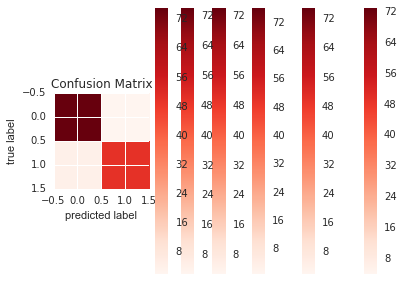

In [122]:
for clf in classifiers:
    train_score(clf, X, y)

## Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [123]:
df['class'] = df['class'].replace('democrat', 1).replace('republican', 0)
y = df['class']

In [124]:
def roc(classifier, x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=4444)
    y_train = np.ravel(y_train)
    clf = classifier.fit(X_train, y_train)
    
    print 'fpr', roc_curve(y_test, clf.predict(X_test))[0][1]
    print 'tpr', roc_curve(y_test, clf.predict(X_test))[0][0]
    
    roc=roc_curve(y_test, clf.predict(X_test))
    plt.figure()
    plt.plot([0,1], [0,1])
    plt.plot(roc[0], roc[1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    #print auc

fpr 0.0925925925926
tpr 0.0
fpr 0.111111111111
tpr 0.0
fpr 0.12962962963
tpr 0.0
fpr 0.0740740740741
tpr 0.0
fpr 0.0555555555556
tpr 0.0
fpr 0.0555555555556
tpr 0.0


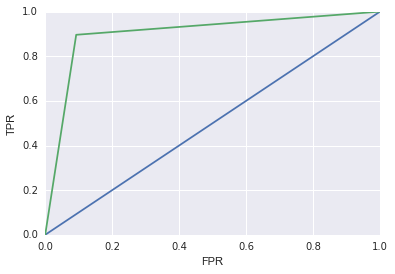

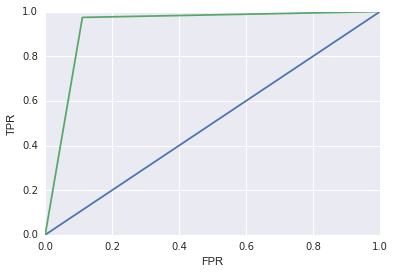

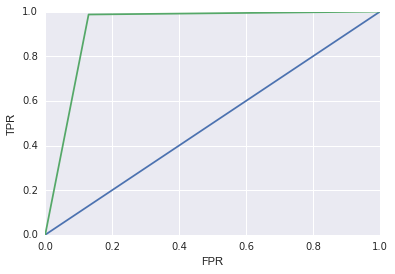

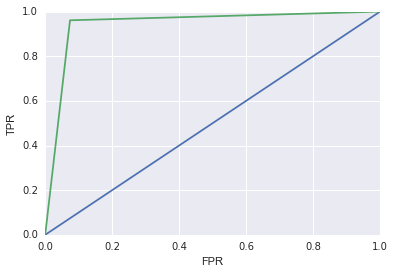

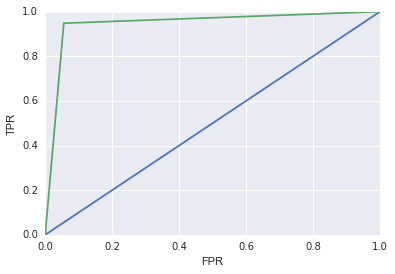

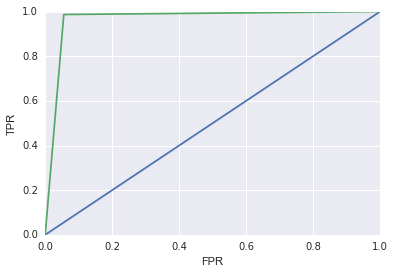

In [125]:
for clf in classifiers:
    roc(clf, X, y)

## Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [109]:
def cv_score(classifier, x, y):
    
    accuracy = np.mean(cross_val_score(classifier, x, y, scoring='accuracy'))
    f1 = np.mean(cross_val_score(classifier, x, y, scoring='f1'))
    precision = np.mean(cross_val_score(classifier, x, y, scoring='precision'))
    recall = np.mean(cross_val_score(classifier, x, y, scoring='recall'))

    print "Accuracy:     %0.2f" %accuracy
    print "Precision:              %0.2f"% precision
    print "Recall:                 %0.2f"% recall
    print "f1:                     %0.2f"% f1
    print '\n'


In [110]:
for clf in classifiers:
    cv_score(clf, df_x, df['class'])

Accuracy:     0.91
Precision:              0.97
Recall:                 0.88
f1:                     0.93


Accuracy:     0.96
Precision:              0.98
Recall:                 0.96
f1:                     0.97


Accuracy:     0.94
Precision:              0.95
Recall:                 0.94
f1:                     0.95


Accuracy:     0.95
Precision:              0.99
Recall:                 0.93
f1:                     0.96


Accuracy:     0.95
Precision:              0.97
Recall:                 0.94
f1:                     0.96


Accuracy:     0.95
Precision:              0.98
Recall:                 0.94
f1:                     0.97




## Challenge 4

For your movie classifiers, calculate the precision and recall for each class.


In [115]:
df = pd.read_csv('2013_movies.csv')
df = df.dropna()

X = df[['Budget', 'Runtime', 'DomesticTotalGross']]
y = df['Rating']

knn = KNeighborsClassifier(n_neighbors = 16, p=2, metric='minkowski')
lr = LogisticRegression()

p_knn = np.mean(cross_val_score(knn, X, y, scoring='precision'))
r_knn = np.mean(cross_val_score(knn, X, y, scoring='recall'))

p_lr = np.mean(cross_val_score(lr, X, y, scoring='precision'))
r_lr = np.mean(cross_val_score(lr, X, y, scoring='recall'))

print "Precision (knn): %0.2f" %p_knn
print "Recall (knn): %0.2f" %r_knn

print "Precision (Logistic Regression): %0.2f" %p_lr
print "Recall (Logistic Regression): %0.2f" %r_lr

Precision (knn): 0.39
Recall (knn): 0.44
Precision (Logistic Regression): 0.52
Recall (Logistic Regression): 0.55


/Users/kpully/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/kpully/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

## Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [116]:
df = pd.read_csv('haberman.data', names=['age', 'yr_operation', 'ax_nodes', 'survival'])

X = df.drop('survival', axis=1)
y = df.survival

lr=LogisticRegression()

fpr 0.111111111111
tpr 0.0


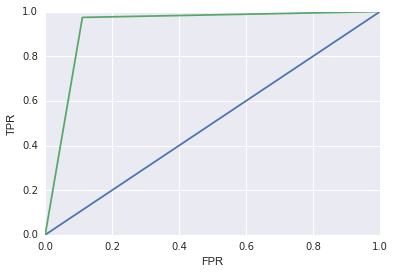

In [126]:
roc(lr, X, y)